**Data 파트**

In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style
import csv
import math

data    = np.genfromtxt("/content/drive/My Drive/data-nonlinear.txt", delimiter=',')

x_data       = data[:, 0]
y_data       = data[:, 1]
label        = data[:, 2]

x_label0    = x_data[label == 0]
x_label1    = x_data[label == 1]

y_label0    = y_data[label == 0]
y_label1    = y_data[label == 1]

#----------------------------------------------------------------------------------------------


theta0 = float( 3.095752713319107 )
theta1 = float( 1.6332390219201367 )
theta2 = float( 2.240121596331915 )
theta3 = float( -3.5704660837272413 )
theta4 = float( -7.187835763674985 )
theta5 = float( -6.72191403471677 )

new_theta0 = float(0)
new_theta1 = float(0)
new_theta2 = float(0)
new_theta3 = float(0)
new_theta4 = float(0)
new_theta5 = float(0)

m = float(len(x_data))

learning_rate = float(0.5)

gradient_theta0 = float(0)
gradient_theta1 = float(0)
gradient_theta2 = float(0)
gradient_theta3 = float(0)
gradient_theta4 = float(0)
gradient_theta5 = float(0)

space_theta0 = []
space_theta1 = []
space_theta2 = []
space_theta3 = []
space_theta4 = []
space_theta5 = []

for i in range(10000):
  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]
    
    sub_func = 1 / (1 + math.exp( -1 * ( theta0 + (theta1 * x) + (theta2 * y) + (theta3 * x * y) + (theta4 * (x**2) ) + (theta5 * (y**2)) )))

    gradient_theta0 += (sub_func - l) / m
    gradient_theta1 += ( (sub_func - l) * x ) / m
    gradient_theta2 += ( (sub_func - l) * y ) / m
    gradient_theta3 += ( (sub_func - l) * x * y ) / m
    gradient_theta4 += ( (sub_func - l) * (x**2) ) / m
    gradient_theta5 += ( (sub_func - l) * (y**2) ) / m

  new_theta0 = theta0 - (learning_rate * gradient_theta0)
  new_theta1 = theta1 - (learning_rate * gradient_theta1)
  new_theta2 = theta2 - (learning_rate * gradient_theta2)
  new_theta3 = theta3 - (learning_rate * gradient_theta3)
  new_theta4 = theta4 - (learning_rate * gradient_theta4)
  new_theta5 = theta5 - (learning_rate * gradient_theta5)
  
  gradient_theta0 = float(0)
  gradient_theta1 = float(0)
  gradient_theta2 = float(0)  
  gradient_theta3 = float(0)
  gradient_theta4 = float(0)
  gradient_theta5 = float(0)

  theta0 = new_theta0
  theta1 = new_theta1
  theta2 = new_theta2
  theta3 = new_theta3
  theta4 = new_theta4
  theta5 = new_theta5

  space_theta0.append(theta0)
  space_theta1.append(theta1)
  space_theta2.append(theta2)
  space_theta3.append(theta3)
  space_theta4.append(theta4)
  space_theta5.append(theta5)

#print('theta0 = float(', theta0,')')
#print('theta1 = float(', theta1,')')
#print('theta2 = float(', theta2,')')
#print('theta3 = float(', theta3,')')
#print('theta4 = float(', theta4,')')
#print('theta5 = float(', theta5,')')

#------------------------------------------------------------------------------------------------

result = float(0)
sub_func = float(0)
J = []


for i in range(len(space_theta0)):
  theta0 = space_theta0[i]
  theta1 = space_theta1[i]
  theta2 = space_theta2[i]
  theta3 = space_theta3[i]
  theta4 = space_theta4[i]
  theta5 = space_theta5[i]

  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]
    sub_func = 1 / (1 + math.exp( -1 * ( theta0 + (theta1 * x) + (theta2 * y) + (theta3 * x * y) + (theta4 * (x**2) ) + (theta5 * (y**2) ) ) ))

    if (sub_func >= 1):
      sub_func = 0.99999


    left = float(math.log(sub_func))
    right = float(math.log(1 - sub_func))             # 바로 result에 삽입했더니 문제가 생겨서 left와 right로 쪼개서 식에 대입함.
                                                      # 세세히 확인해보니 right파트에서 sub_func이 반올림 되서 1의 값을 가지는 경우가 생기는데
                                                      # 이 값이 log (1 - right) 가 되면서 마이너스 무한대의 값을 가져서 에러가 남
                                                      # 따라서 if문을 통해서 1이 아닌 0.99999로 값을 바꿔주었음.

    result += ( (-1 * l * left) + ((l - 1) * right) ) / m
  J.append(result)
  result = float(0)

  #----------------------------------------------------------------------------------------------------

basis = float(-1)
accur = []
total_num = m
corre_num = 0
new_accur = float(0)


for i in range(len(space_theta0)):

  theta0 = space_theta0[i]
  theta1 = space_theta1[i]
  theta2 = space_theta2[i]
  theta3 = space_theta3[i]
  theta4 = space_theta4[i]
  theta5 = space_theta5[i]

  for j in range(len(x_data)):

    x = x_data[j]
    y = y_data[j]
    l = label[j]

    if theta0 + (theta1 * x) + (theta2 * y) + (theta3 * x * y) + (theta4 * (x**2)) + (theta5 * (y**2)) <= 0:         # x제곱과 y제곱의 계수가 음수이므로 레이블 조건이 역으로 바뀌어야한다.
      basis = 0                                                                                                      # 따라서 0보다 작거나 같을때는 레이블이 0, 0보다 클때는 레이블이 1이여야 한다.
      if basis == l:                                                                                                 # 예를 들어서 x^2 + y^2 - 4 < 0 이면 원점을 중심으로 반지름이 2인 원 안에 해당하는 게 레이블이 1이여야 하지만
        corre_num = corre_num + 1                                                                                    # 주어진 식에서 x제곱과 y제곱의 계수가 음수이므로
    elif theta0 + (theta1 * x) + (theta2 * y) + (theta3 * x * y) + (theta4 * (x**2)) + (theta5 * (y**2)) > 0:        # -x^2 + -y^2 + 4 에서의 방정식은 0보다 클 때 레이블이 1이여야 한다.
      basis = 1
      if basis == l:
        corre_num = corre_num + 1

    if basis == -1:                                                                                                  # 위의 if문에 적용되지 않아 basis값이 바뀌지 않을 경우 코딩이 잘못 되었다는 것을 알린다.
      print('에러발생')
  
  new_accur = ( corre_num / total_num ) * 100
  accur.append(new_accur)

  corre_num = 0
  basis = float(-1)

#-----------------------------------------------------------------------------------------------------

store_x = []
store_y = []
x1 = np.arange(float(-1),float(1.25),float(0.01))
y1 = np.arange(float(-1),float(1.25),float(0.01))
for i in range(len(x1)):
  x = x1[i]
  for j in range(len(y1)):
    y = y1[j]
    if theta0 + (theta1 * x) + (theta2 * y) + (theta3 * x * y) + (theta4 * (x**2)) + (theta5 * (y**2)) <= 0.1:
      if theta0 + (theta1 * x) + (theta2 * y) + (theta3 * x * y) + (theta4 * (x**2)) + (theta5 * (y**2)) > -0.1:
        store_x.append(x)
        store_y.append(y)

**Task 1**

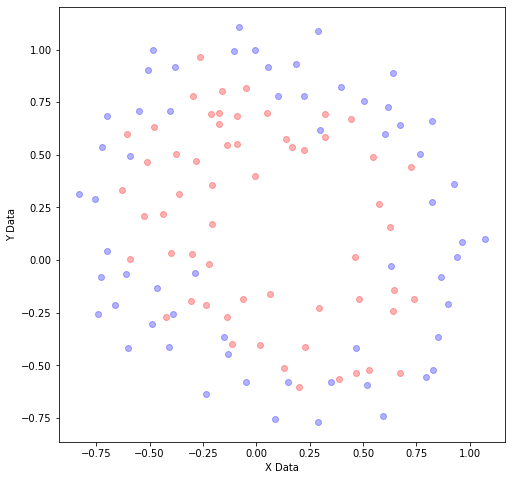

In [0]:
plt.figure(figsize=(8, 8))
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

**Task 2**


In [0]:
print('g(x,y,theta) = ', theta0, '+', theta1, ' x + ', theta2, ' y + ', theta3, ' xy +', theta4, ' x^2 + ', theta5, ' y^2 ')

g(x,y,theta) =  5.116376742218597 + 3.206104335753032  x +  4.1169076393785895  y +  -7.4293942614541635  xy + -11.902331696641259  x^2 +  -11.691311199851663  y^2 


**Task 3**

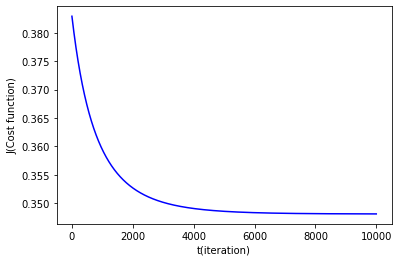

In [0]:
x = range(10000)
plt.xlabel('t(iteration)')
plt.ylabel('J(Cost function)')
plt.plot(x, J, 'blue')
plt.show()

**Task 4**

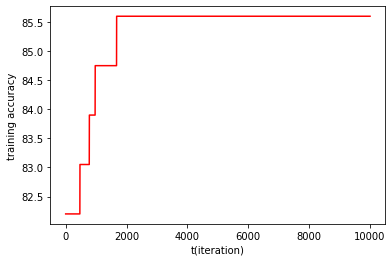

In [0]:
x = range(10000)
plt.xlabel('t(iteration)')
plt.ylabel('training accuracy')
plt.plot(x, accur, 'red')
plt.show()

**Task 5**

In [0]:
print('training accuracy =', accur[9999], '%')

training accuracy = 85.59322033898306 %


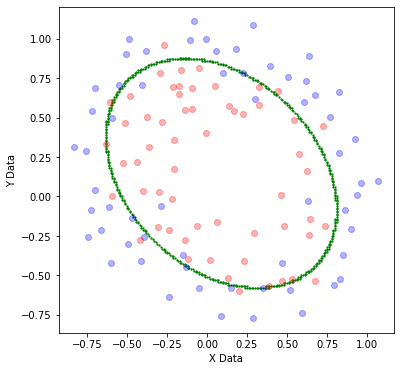

In [0]:
plt.figure(figsize=(6, 6))
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.scatter(store_x, store_y, c='green', s=1.5)
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()